# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.078559e+01     7.864826e+00
 * time: 0.0020380020141601562
     1     3.049109e+01     5.436990e+00
 * time: 0.007971048355102539
     2     2.556445e+01     8.098924e+00
 * time: 0.014892101287841797
     3     1.291465e+01     2.217201e+00
 * time: 0.0691671371459961
     4     1.070588e+01     1.133344e+00
 * time: 0.07355499267578125
     5     1.052749e+01     2.312103e+00
 * time: 0.07723093032836914
     6     9.833507e+00     1.217533e+00
 * time: 0.08072209358215332
     7     9.428239e+00     1.031218e+00
 * time: 0.08443999290466309
     8     9.008904e+00     8.449800e-01
 * time: 0.0882270336151123
     9     8.664488e+00     6.628323e-01
 * time: 0.09180402755737305
    10     8.387719e+00     6.662855e-01
 * time: 0.09541606903076172
    11     8.234843e+00     6.497829e-01
 * time: 0.09916400909423828
    12     8.097954e+00     5.231240e-01
 * time: 0.10277891159057617
    13     8.034984e+00     6.468202e-01
 * tim

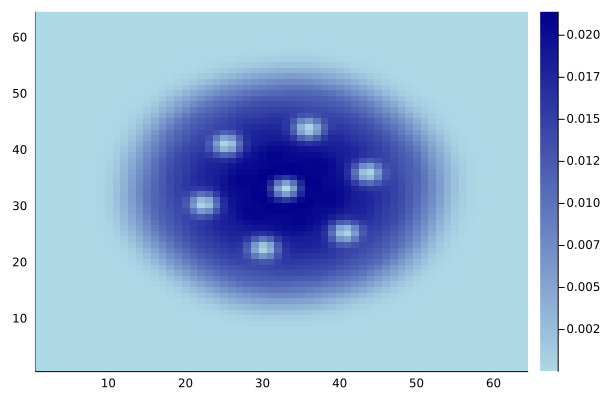

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)